## Import the Relevant Libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

## Import and Read the CSV File

In [3]:
# Metadata of the training images 
train_meta = "RSNA_Mammograms/train.csv"

In [4]:
# Read the train metadata and insert it into a Pandas dataframe
train_df = pd.read_csv(train_meta)

## Display the Information of the Dataframe Created

In [5]:
# Display the first 10 rows of the metadata
train_df.head(10)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
5,2,10011,270344397,L,MLO,55.0,0,0,0,0.0,0,NaN,21,True
6,2,10011,541722628,R,CC,55.0,0,0,0,NaN,0,NaN,21,False
7,2,10011,1031443799,R,MLO,55.0,0,0,0,NaN,0,NaN,21,False
8,2,10025,562340703,L,CC,75.0,0,0,0,NaN,0,NaN,29,False
9,2,10025,1365269360,L,MLO,75.0,0,0,0,NaN,0,NaN,29,False


In [6]:
# Display the lats 10 rows of the metadata
train_df.tail(10)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
54696,1,997,1487679918,R,CC,42.0,0,0,0,1.0,0,B,49,False
54697,1,997,1775983513,R,MLO,42.0,0,0,0,1.0,0,B,49,False
54698,1,9973,1345265157,L,CC,43.0,0,0,0,1.0,0,C,49,False
54699,1,9973,1703611570,L,MLO,43.0,0,0,0,1.0,0,C,49,False
54700,1,9973,655941939,R,CC,43.0,0,0,0,1.0,0,C,49,False
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True
54705,1,9989,439796429,R,CC,60.0,0,0,0,0.0,0,C,216,True


In [7]:
# Validating the number of patient images
len(train_df)

54706

## Understanding the Data and Checking if the Data is Balanced
- The cancer column indicates, whether or not the breast was positive for malignant cancer.
- 0 = false
- 1 = true

- Thus, if the column is 0, the patient is without cancer. 

In [8]:
# The number of patients without cancer
no_cancer = len(train_df[train_df["cancer"] == 0])
print(no_cancer)

53548


In [9]:
# The number of patients with cancer
cancer = len(train_df[train_df["cancer"] == 1])
print(cancer)

1158


In [10]:
# Checking to see if there are empty fields with no cancer indications 
# The value correlated with the number of patient images
print(no_cancer + cancer)
print(len(train_df))
print((no_cancer + cancer) == len(train_df))

54706
54706
True


In [11]:
# Checking the values present in the BIRADS column
train_df.BIRADS.unique()

array([nan,  0.,  1.,  2.])

In [12]:
# Checking the number of images without cancer in the BIRADS column
BIRADS0 = len(train_df[train_df["BIRADS"] == 0])
BIRADS1 = len(train_df[train_df["BIRADS"] == 1])
BIRADS2 = len(train_df[train_df["BIRADS"] == 2])
print(BIRADS0 + BIRADS1 + BIRADS2)

26286


In [13]:
# Checking the number of images without cancer in the BIRADS column and the correlating cancer column
cancerBIRAD0 = len(train_df[(train_df["BIRADS"] == 0) & (train_df["cancer"] == 0)])
cancerBIRAD1 = len(train_df[(train_df["BIRADS"] == 1) & (train_df["cancer"] == 0)])
cancerBIRAD2 = len(train_df[(train_df["BIRADS"] == 2) & (train_df["cancer"] == 0)])
print(cancerBIRAD0 + cancerBIRAD1 + cancerBIRAD2)

25622


## Plotting the Imbalance of the Data

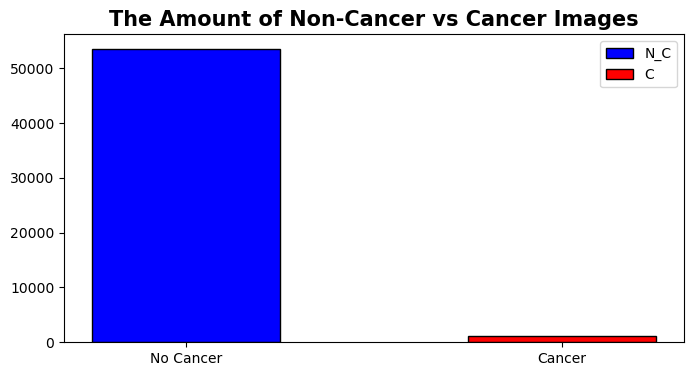

In [14]:
# Make the plot
fig = plt.figure(figsize = (8, 4))

# Define the different bars
plt.bar("No Cancer", no_cancer, color = "b", width = 0.5, edgecolor = "black", label = "N_C") 
plt.bar("Cancer", cancer, color = "r", width = 0.5, edgecolor = "black", label = "C") 

# Adding a title 
plt.title("The Amount of Non-Cancer vs Cancer Images", fontweight = "bold", fontsize = 15) 

# Show the plot and legend
plt.legend()
plt.show() 

## Create a New Dataframe for Modification 

In [15]:
new_df = train_df.copy()

In [16]:
new_df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [17]:
# Get the data type in each column
new_df.dtypes

site_id                      int64
patient_id                   int64
image_id                     int64
laterality                  object
view                        object
age                        float64
cancer                       int64
biopsy                       int64
invasive                     int64
BIRADS                     float64
implant                      int64
density                     object
machine_id                   int64
difficult_negative_case       bool
dtype: object

In [18]:
# Convert the data type of a column patient_id and image_id to string
new_df["patient_id"] = new_df["patient_id"].astype(str)
new_df["image_id"] = new_df["image_id"].astype(str)

In [19]:
# Get the data type in each column
new_df.dtypes

site_id                      int64
patient_id                  object
image_id                    object
laterality                  object
view                        object
age                        float64
cancer                       int64
biopsy                       int64
invasive                     int64
BIRADS                     float64
implant                      int64
density                     object
machine_id                   int64
difficult_negative_case       bool
dtype: object

In [20]:
# Add a new column combining the patient_id and image_id
new_df["patient_image_id"] = new_df["patient_id"] + "_" + new_df["image_id"]

In [21]:
# Demonstrate the new column added
new_df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,patient_image_id
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,10006_462822612
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,10006_1459541791
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,10006_1864590858
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,10006_1874946579
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,10011_220375232


In [22]:
# Drop a column patient_id and image_id
new_df = new_df.drop(columns = ["patient_id"])
new_df = new_df.drop(columns = ["image_id"])

In [23]:
# Demonstrate the new column added
new_df.head()

,site_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,patient_image_id
0,2,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,10006_462822612
1,2,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,10006_1459541791
2,2,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,10006_1864590858
3,2,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,10006_1874946579
4,2,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,10011_220375232


In [24]:
# Shift patient_image_id column to first position 
first_column = new_df.pop("patient_image_id")

In [25]:
# Insert column using insert(position, column_name, first_column) function 
new_df.insert(0, "patient_image_id", first_column) 

In [26]:
# Demonstrate the new dataframe
new_df.head()

,patient_image_id,site_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,10006_462822612,2,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,10006_1459541791,2,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,10006_1864590858,2,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,10006_1874946579,2,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,10011_220375232,2,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


## Sort the New Dataframe

In [27]:
# Sort according to the patient_image_id
sorted_new_df = new_df.sort_values(by = "patient_image_id")

In [28]:
# Demonstrate the new sorted dataframe
sorted_new_df.head()

,patient_image_id,site_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
1,10006_1459541791,2,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,10006_1864590858,2,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,10006_1874946579,2,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
0,10006_462822612,2,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
7,10011_1031443799,2,R,MLO,55.0,0,0,0,NaN,0,NaN,21,False


## Save the New Dataframe to a CSV File 

In [31]:
# Write the new dataframe to a CSV file
# Set index to false to avoid writing row indices
sorted_new_df.to_csv("sorted_new_train.csv", index = False)  

## Import and Read the Newly Written CSV File

In [32]:
# Read the new sorted train metadata and insert it into a Pandas dataframe
new_sorted_train_df = pd.read_csv("sorted_new_train.csv")

In [38]:
# Display the first 5 rows of the metadata
new_sorted_train_df.head(2)

,patient_image_id,site_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,10006_1459541791,2,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
1,10006_1864590858,2,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False


In [39]:
# Display the last 5 rows of the metadata
new_sorted_train_df.tail(2)

,patient_image_id,site_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
54704,9989_439796429,1,R,CC,60.0,0,0,0,0.0,0,C,216,True
54705,9989_63473691,1,L,MLO,60.0,0,0,0,NaN,0,C,216,False


## Dataframe - Cancer

In [36]:
cancer_df = new_sorted_train_df.copy()

In [40]:
# Demonstrate the cancer dataframe
cancer_df.head()

,patient_image_id,site_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,10006_1459541791,2,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
1,10006_1864590858,2,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,10006_1874946579,2,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
3,10006_462822612,2,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,10011_1031443799,2,R,MLO,55.0,0,0,0,NaN,0,NaN,21,False


In [41]:
# Filtering rows where column cancer is equal to 1
cancer_df = cancer_df[cancer_df["cancer"] == 1]

In [42]:
# Demonstrate the new cancer dataframe
cancer_df.head()

,patient_image_id,site_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
89,10130_1360338805,1,L,CC,71.0,1,1,1,0.0,0,B,49,False
90,10130_1672636630,1,L,MLO,71.0,1,1,1,0.0,0,B,49,False
92,10130_388811999,1,L,MLO,71.0,1,1,1,0.0,0,B,49,False
93,10130_613462606,1,L,CC,71.0,1,1,1,0.0,0,B,49,False
193,10226_461614796,1,L,MLO,71.0,1,1,1,0.0,0,C,49,False


In [43]:
# Get the length of the dataframe
len(cancer_df)

1158

## Dataframe - Non Cancer

In [44]:
non_cancer_df = new_sorted_train_df.copy()

In [45]:
# Demonstrate the non cancer dataframe
non_cancer_df.head()

,patient_image_id,site_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,10006_1459541791,2,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
1,10006_1864590858,2,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,10006_1874946579,2,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
3,10006_462822612,2,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,10011_1031443799,2,R,MLO,55.0,0,0,0,NaN,0,NaN,21,False


In [46]:
# Filtering rows where column cancer is equal to 0
non_cancer_df = non_cancer_df[non_cancer_df["cancer"] == 0]

In [47]:
# Demonstrate the new non cancer dataframe
non_cancer_df.head(10)

,patient_image_id,site_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,10006_1459541791,2,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
1,10006_1864590858,2,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,10006_1874946579,2,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
3,10006_462822612,2,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,10011_1031443799,2,R,MLO,55.0,0,0,0,NaN,0,NaN,21,False
5,10011_220375232,2,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
6,10011_270344397,2,L,MLO,55.0,0,0,0,0.0,0,NaN,21,True
7,10011_541722628,2,R,CC,55.0,0,0,0,NaN,0,NaN,21,False
8,10025_1365269360,2,L,MLO,75.0,0,0,0,NaN,0,NaN,29,False
9,10025_288394860,2,R,CC,75.0,0,0,0,NaN,0,NaN,29,False


In [48]:
# Get the length of the dataframe
len(non_cancer_df)

53548

## Save the New Dataframes to a CSV File 

In [49]:
# Write the new dataframes to a CSV file
# Set index to false to avoid writing row indices

# Write the cancer dataframe
cancer_df.to_csv("sorted_cancer_df.csv", index = False)

# Write the non cancer dataframe
non_cancer_df.to_csv("sorted_non_cancer_df.csv", index = False)